## Project: Write A Data Science Blog Post

##### In this project I will choose dataset and pose at least three quesstions related to business or real-world applications. 

**First Step : pick a dataset.**

In this project I will choose the 2019 Stack Overflow results.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Load in survey results data
df = pd.read_csv('survey_results_public2.csv')

In [3]:
# Load in data schema 
schema = pd.read_csv('survey_results_schema.csv')

In [4]:
# Check the structure of the data
df.shape

(88883, 85)

In [5]:
# Check columns names
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [6]:
# Assess missing data
df.isnull().sum()

Respondent            0
MainBranch          552
Hobbyist              0
OpenSourcer           0
OpenSource         2041
Employment         1702
Country             132
Student            1869
EdLevel            2493
UndergradMajor    13269
EduOther           4623
OrgSize           17092
DevType            7548
YearsCode           945
Age1stCode         1249
YearsCodePro      14552
CareerSat         16036
JobSat            17895
MgrIdiot          27724
MgrMoney          27726
MgrWant           27651
JobSeek            8328
LastHireDate       9029
LastInt           21728
FizzBuzz          17539
JobFactors         9512
ResumeUpdate      11006
CurrencySymbol    17491
CurrencyDesc      17491
CompTotal         32938
                  ...  
Containers         3517
BlockchainOrg     40708
BlockchainIs      28718
BetterLife         2614
ITperson           1742
OffOn              2220
SocialMedia        4446
Extraversion       1578
ScreenName         8397
SOVisit1st         5006
SOVisitFreq     

In [7]:
#Check the description of the columns
schema.set_index('Column').loc[['MainBranch', 'Country' , 'EdLevel', 'UndergradMajor', 'ConvertedComp', 'CareerSat']].values.tolist()

[['Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'],
 ['In which country do you currently reside?'],
 ['Which of the following best describes the highest level of formal education that you’ve completed?'],
 ['What was your main or most important field of study?'],
 ['Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.'],
 ['Overall, how satisfied are you with your career thus far?']]

**Pose Questions:**

- How much does a software developer make?
- What is the developer salary by level of education?
- Which country has the highest job satisfaction?
- What is the average salary for devlopers KSA?

### Prepare data:


In [8]:
# Extract  necessary columns to answer the questions.
sub_df = df[['MainBranch', 'Country' , 'EdLevel', 'UndergradMajor', 'ConvertedComp', 'CareerSat']]

In [9]:
sub_df.head()

,MainBranch,Country,EdLevel,UndergradMajor,ConvertedComp,CareerSat
0,I am a student who is learning to code,United Kingdom,Primary/elementary school,NaN,NaN,NaN
1,I am a student who is learning to code,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...",Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,8820.0,Slightly satisfied
3,I am a developer by profession,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",61000.0,Very satisfied
4,I am a developer by profession,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Very dissatisfied


In [10]:
# Change 'ConvertedComp' name to AnnualSalary
sub_df.rename(columns={"ConvertedComp": "AnnualSalary"}, inplace = True)

In [11]:
sub_df.head()

,MainBranch,Country,EdLevel,UndergradMajor,AnnualSalary,CareerSat
0,I am a student who is learning to code,United Kingdom,Primary/elementary school,NaN,NaN,NaN
1,I am a student who is learning to code,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...",Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,8820.0,Slightly satisfied
3,I am a developer by profession,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",61000.0,Very satisfied
4,I am a developer by profession,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Very dissatisfied


**Assess Missing Data**

In [12]:
#Check null values
sub_df.isnull().sum()

MainBranch          552
Country             132
EdLevel            2493
UndergradMajor    13269
AnnualSalary      33060
CareerSat         16036
dtype: int64

In [13]:
# Data proportion in each column
1 - sub_df.isnull().mean()

MainBranch        0.993790
Country           0.998515
EdLevel           0.971952
UndergradMajor    0.850714
AnnualSalary      0.628050
CareerSat         0.819583
dtype: float64

In [14]:
sub_df[sub_df['AnnualSalary'].isnull()].isnull().sum()

MainBranch          552
Country             132
EdLevel            1662
UndergradMajor     8710
AnnualSalary      33060
CareerSat         16036
dtype: int64

In [15]:
# Drop missing values in 'ConvertedComp' column..
sub_df.dropna(subset=['AnnualSalary'], axis = 0, inplace = True)

In [16]:
1 - sub_df.isnull().mean()

MainBranch        1.000000
Country           1.000000
EdLevel           0.985114
UndergradMajor    0.918331
AnnualSalary      1.000000
CareerSat         1.000000
dtype: float64

In [17]:
# Drop rows with missing values..
sub_df.dropna(axis=0, how='all', inplace = True) 

**Assess categorical variables**

**Re-Encode Features**

In [18]:
sub_df['MainBranch'].value_counts()

I am a developer by profession                                                   50502
I am not primarily a developer, but I write code sometimes as part of my work     5321
Name: MainBranch, dtype: int64

In [19]:
sub_df['MainBranch'].replace({'I am a developer by profession' : 'Developer', 
                              'I am not primarily a developer, but I write code sometimes as part of my work': 'Non-developer who sometimes writes code'}, inplace = True)

In [20]:
sub_df['MainBranch'].value_counts()

Developer                                  50502
Non-developer who sometimes writes code     5321
Name: MainBranch, dtype: int64

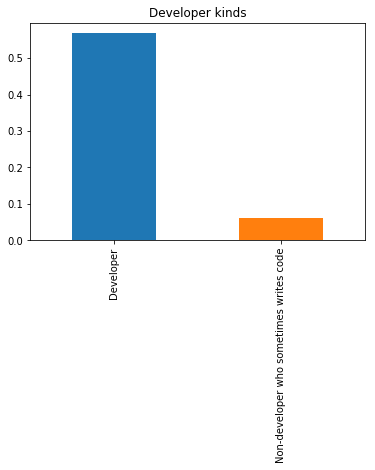

In [21]:
devlop_vals = sub_df['MainBranch'].value_counts()
(devlop_vals/df.shape[0]).plot(kind="bar");
plt.title("Developer kinds");

In [22]:
sub_df['EdLevel'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              27063
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           13826
Some college/university study without earning a degree                                 6496
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2823
Associate degree                                                                       1860
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1699
Professional degree (JD, MD, etc.)                                                      745
Primary/elementary school                                                               260
I never completed any formal education                                                  220
Name: EdLevel, dtype: int64

In [23]:
sub_df['EdLevel'].replace({'Bachelor’s degree (BA, BS, B.Eng., etc.)' :  'Bachelor’s degree', 
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
                           'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
                           'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
                           'Professional degree (JD, MD, etc.)' : 'Professional degree'}, inplace = True)

In [24]:
sub_df['EdLevel'].value_counts()

Bachelor’s degree                                         27063
Master’s degree                                           13826
Some college/university study without earning a degree     6496
Secondary school                                           2823
Associate degree                                           1860
Doctoral degree                                            1699
Professional degree                                         745
Primary/elementary school                                   260
I never completed any formal education                      220
Name: EdLevel, dtype: int64

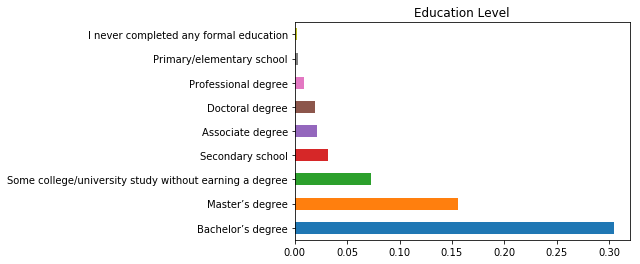

In [25]:
EdLevel_vals = sub_df['EdLevel'].value_counts()
(EdLevel_vals/df.shape[0]).plot(kind="barh");
plt.title("Education Level");

In [26]:
sub_df['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          32356
Another engineering discipline (ex. civil, electrical, mechanical)        4204
Information systems, information technology, or system administration     3460
A natural science (ex. biology, chemistry, physics)                       2303
Web development or web design                                             2030
Mathematics or statistics                                                 2030
A business discipline (ex. accounting, finance, marketing)                1154
A humanities discipline (ex. literature, history, philosophy)             1138
A social science (ex. anthropology, psychology, political science)         962
Fine arts or performing arts (ex. graphic design, music, studio art)       898
I never declared a major                                                   575
A health science (ex. nursing, pharmacy, radiology)                        154
Name: UndergradMajor, dtype: int64

In [27]:
sub_df['UndergradMajor'].replace({'Another engineering discipline (ex. civil, electrical, mechanical)' :  'Another engineering discipline', 
                            'A natural science (ex. biology, chemistry, physics)': 'A natural science',
                           'A business discipline (ex. accounting, finance, marketing)': 'A business discipline',
                           'A humanities discipline (ex. literature, history, philosophy)': 'A humanities discipline',
                           'A social science (ex. anthropology, psychology, political science)' : 'A social science',
                          'Fine arts or performing arts (ex. graphic design, music, studio art)' : 'Fine arts or performing arts',
                          'A health science (ex. nursing, pharmacy, radiology)' : 'A health science'}, inplace = True)

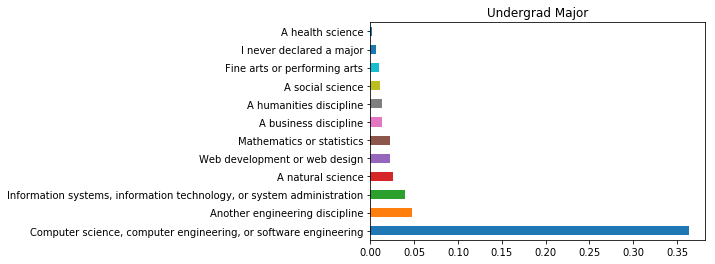

In [28]:
major_vals = sub_df['UndergradMajor'].value_counts()
(major_vals/df.shape[0]).plot(kind="barh");
plt.title("Undergrad Major");

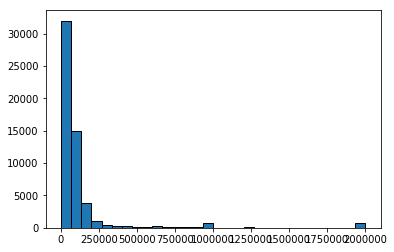

In [29]:
plt.hist(sub_df['AnnualSalary'], bins = 30, edgecolor = 'black');

In [30]:
sub_df.CareerSat.value_counts()

Very satisfied                        23257
Slightly satisfied                    19456
Slightly dissatisfied                  5692
Neither satisfied nor dissatisfied     4759
Very dissatisfied                      2659
Name: CareerSat, dtype: int64

In [31]:
sub_df['CareerSat'].replace({'Very satisfied' : 4, 
                            'Slightly satisfied': 3,
                            'Slightly dissatisfied': 2,
                            'Neither satisfied nor dissatisfied': 1,
                            'Very dissatisfied': 0}, inplace = True)

In [32]:
sub_df.CareerSat.value_counts()

4    23257
3    19456
2     5692
1     4759
0     2659
Name: CareerSat, dtype: int64

### Analyze, and Visualize

#### Question1: How much does a developer make?

In [33]:
sub_df['AnnualSalary'].mean(), sub_df['AnnualSalary'].max(), sub_df['AnnualSalary'].median()

(127110.73842323056, 2000000.0, 57287.0)

In [34]:
pd.DataFrame(sub_df['AnnualSalary'].describe())

,AnnualSalary
count,5.582300e+04
mean,1.271107e+05
std,2.841523e+05
min,0.000000e+00
25%,2.577750e+04
50%,5.728700e+04
75%,1.000000e+05
max,2.000000e+06


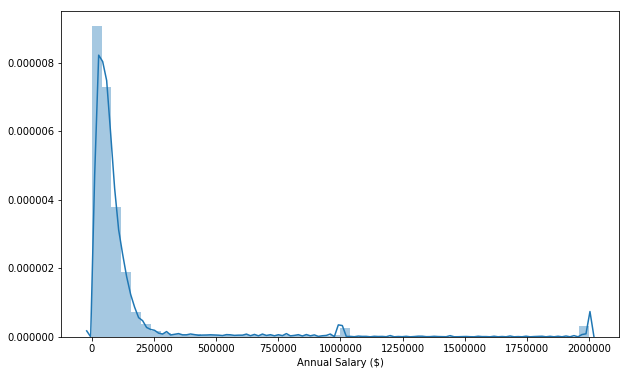

In [35]:
f, ax = plt.subplots(figsize=(10, 6))

ax = sb.distplot(sub_df['AnnualSalary'])
plt.xlabel('Annual Salary ($)');

#### Question2: What is the developer salary by level of education?

In [36]:
pd.DataFrame(sub_df.query("MainBranch == 'Developer' ").groupby(['EdLevel']).mean()['AnnualSalary']).sort_values(by = 'AnnualSalary', ascending=False)

,AnnualSalary
EdLevel,
Doctoral degree,182910.877768
I never completed any formal education,149399.673267
Associate degree,144764.033077
Bachelor’s degree,134980.777222
Master’s degree,120875.909584
Some college/university study without earning a degree,116971.984060
Primary/elementary school,95271.360000
Professional degree,84585.213752
Secondary school,84052.489780


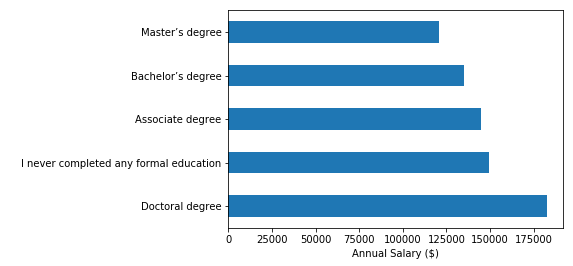

In [37]:
base_color = sb.color_palette()[0]
edlevel = (sub_df.query("MainBranch == 'Developer' ").groupby(['EdLevel']).mean()['AnnualSalary']).sort_values(ascending=False).head()
edlevel.plot(kind = 'barh', color = base_color );
plt.ylabel(' ')
plt.xlabel('Annual Salary ($)');

#### Question4:Which country has the highest devloper salary?

In [38]:
pd.DataFrame(sub_df.query("MainBranch == 'Developer' ").groupby(['Country']).mean()['AnnualSalary']).sort_values(by = 'AnnualSalary', ascending=False).head()

,AnnualSalary
Country,
Liechtenstein,811188.00000
San Marino,577452.00000
United States,251783.92000
Ireland,247802.42671
Swaziland,242607.50000


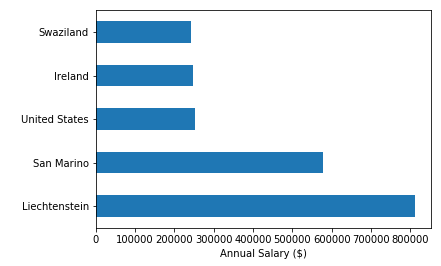

In [39]:
base_color = sb.color_palette()[0]
paid_countries = (sub_df.query("MainBranch == 'Developer' ").groupby(['Country']).mean()['AnnualSalary']).sort_values(ascending=False).head()
paid_countries.plot(kind = 'barh', color = base_color );
plt.ylabel(' ')
plt.xlabel('Annual Salary ($)');

#### Question4:Which country has the highest job satisfaction?

In [40]:
(sub_df.query("MainBranch == 'Developer' ").groupby(['Country'])['CareerSat']).mean().sort_values(ascending=False).head(10)

Country
Somalia                             4.000000
Oman                                4.000000
Barbados                            4.000000
San Marino                          4.000000
Democratic Republic of the Congo    4.000000
Yemen                               3.666667
Haiti                               3.500000
Zambia                              3.400000
Mozambique                          3.333333
Qatar                               3.333333
Name: CareerSat, dtype: float64

#### Question5: What is the average salary for devlopers in  KSA?

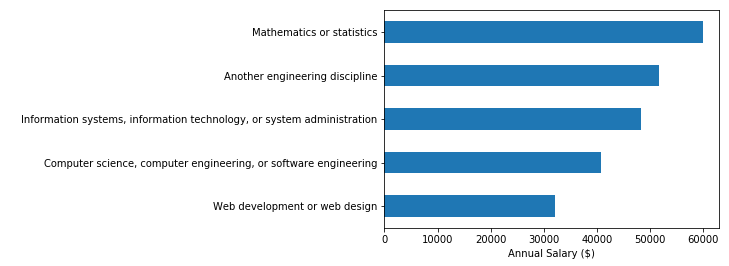

In [41]:
base_color = sb.color_palette()[0]
KSA_sal = (sub_df.query("MainBranch == 'Developer' and ( Country == 'Saudi Arabia')").groupby([ 'UndergradMajor']).mean()['AnnualSalary']).sort_values()
KSA_sal.plot(kind = 'barh', color = base_color)
plt.ylabel(' ')
plt.xlabel('Annual Salary ($)');